# Color Threshold, Blue Screen

### Import resources

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [27]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')

# Print out the type of image data and its dimensions (height, width, and color)
print('This image is:', type(image), 
      ' with dimensions:', image.shape)


This image is: <class 'numpy.ndarray'>  with dimensions: (514, 816, 3)


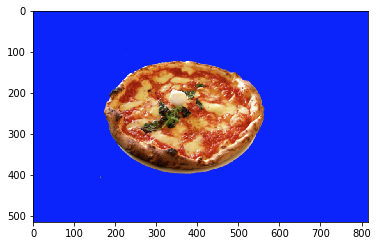

In [28]:
image_copy = np.copy(image)

image = cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB)
plt.imshow(image)

### Define the color threshold

In [32]:
lower_threshold = np.array([0,0,200])
upper_threshold = np.array([200,200,255])

### Create a mask

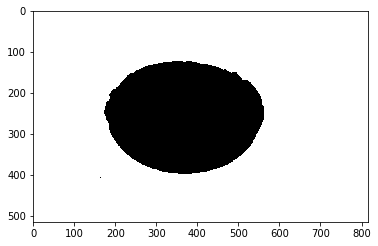

In [42]:
mask = cv2.inRange(image,lower_threshold, upper_threshold)
plt.imshow(mask, cmap='gray')

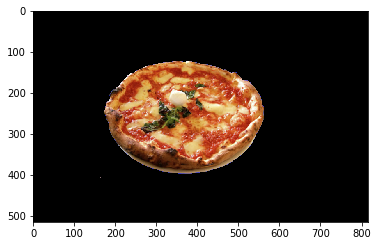

In [45]:
# # Mask the image to let the pizza show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# # Display it!
plt.imshow(masked_image)


### Mask and add a background image

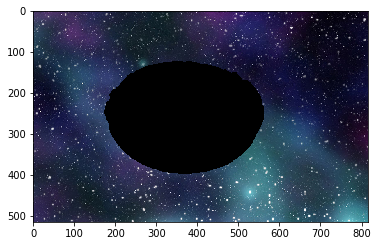

In [49]:
# # Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# # Crop it to the right size (514x816)
crop_background = background_image[0:514, 0:816]

# # # Mask the cropped background so that the pizza area is blocked
crop_background[mask == 0] = [0, 0, 0]

# # # Display the background
plt.imshow(crop_background)

### Create a complete image

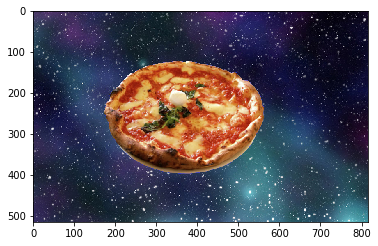

In [50]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background

# Display the result
plt.imshow(complete_image)